# Project 7 Machine Learning

### Kelly Bromley
### 06/13/2024

[Project 7 - Machine Learning Repository](https://github.com/K-Bromley/datafun-07-ml)

## Imported Dependencies

In [1109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Part 1 - Chart a Straight Line

### Demonstrated below is a chart showing the correlation between Celsius and Fahrenheit.

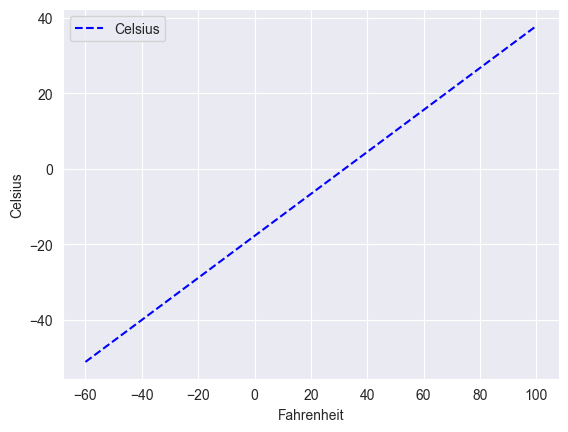

In [1110]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(-60, 110, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', color='blue', style = '--')
y_label = axes.set_ylabel('Celsius')
x_label = axes.set_xlabel('Fahrenheit')

#### The thing I love about this visual is both Celsius and Fahrenheit are the same at -40 degrees.

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [1111]:
nyc_df = pd.read_csv('data/ave_hi_nyc2_jan_1895-2018.csv')


### Section 2 - Data Inspection

### Show Head

In [1112]:
print(nyc_df.head())

   Date  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0


### Show Tail

In [1113]:
print(nyc_df.tail())

     Date  Value  Anomaly
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3


### Section 3 - Data Cleaning

In [1114]:
nyc_df.columns = ('Date', 'Temperature', 'Anomaly')

print(nyc_df.head(5))

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics

In [1115]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [1116]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
print(f'slope =',linear_regression.slope)

linear_regression.intercept
print(f'intercept =',linear_regression.intercept)

slope = 0.014771361132966163
intercept = 8.694993233674289


### Section 6 - Predict

#### Predicting Temperature for 2024

In [1117]:
nyc_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(f'nyc_temp_2024:', nyc_temp_2024)

nyc_temp_2024: 38.5922281667978


### Section 7 - Visualizations

Text(0.5, 1.0, 'Average High Temperature for NYC in January')

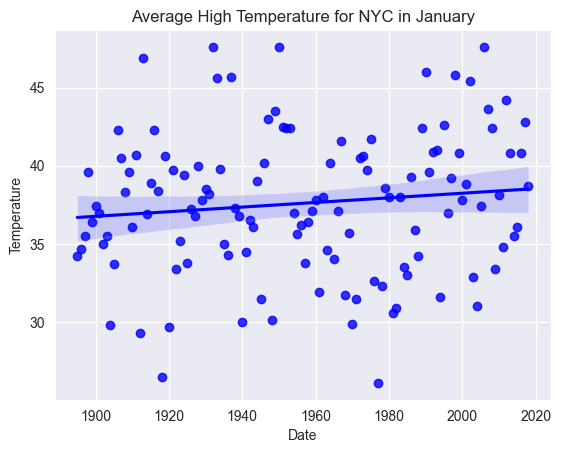

In [1118]:
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature,  color='b')
axes.set_title('Average High Temperature for NYC in January')

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

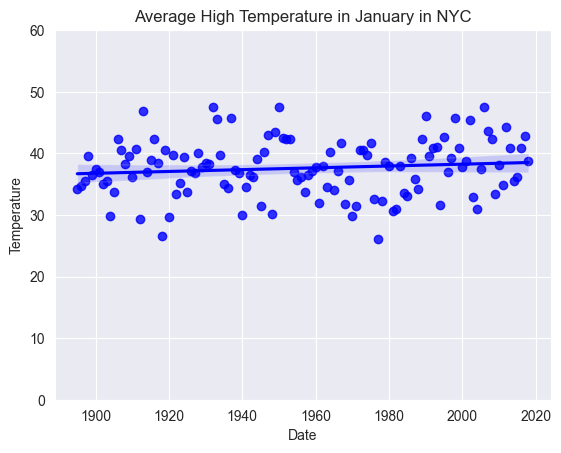

In [1119]:
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature,  color='b')
axes.set_ylim(0, 60)
axes.set_title('Average High Temperature in January in NYC')

## Part 3 - Prediction

### Section 1 - Build the Model

In [1120]:

X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values,random_state = 11)


In [1121]:
X_train.shape

(93, 1)

In [1122]:
X_test.shape

(31, 1)

In [1123]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

#Show the slope and intercept of the model
m = linear_regression.coef_
print(f'Slope =', m)

Slope = [0.01939167]


In [1124]:
b = linear_regression.intercept_
print(f'Y-Intercept =', b)

Y-Intercept = -0.30779820252658396


In [1125]:
print(f'Linear regression is y = {m}x + {b}.')

Linear regression is y = [0.01939167]x + -0.30779820252658396.


### Section 2 - Test the Model

In [1126]:
predicted = linear_regression.predict(X_test)

expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [1127]:
predict = (lambda x: m * x + b)
predict(2019)

array([38.84399018])

In [1128]:
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

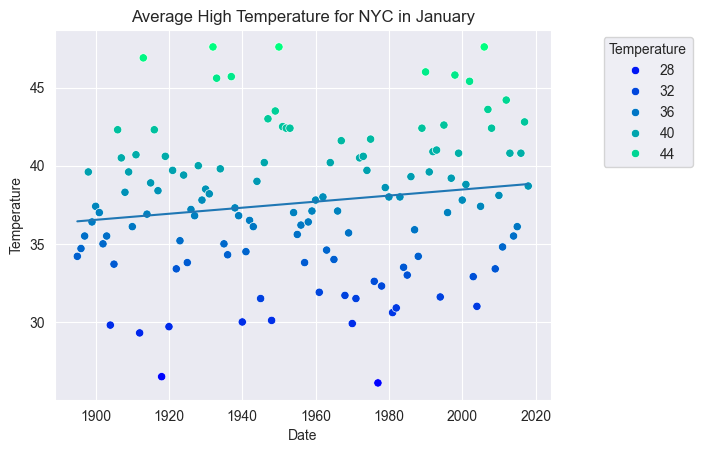

In [1129]:
axes = sns.scatterplot(data=nyc_df, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend = True)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
axes.set_title('Average High Temperature for NYC in January')
line = plt.plot(x, y)
plt.legend(title='Temperature', bbox_to_anchor= (1.3,1))
plt.show

## Part 4 - Insights and Remarks